## Data Analysis using Pandas


### Question 1 (100 points) Celluloid ceiling

Wonder Woman             |  Captain Marvel
:-------------------------:|:-------------------------:
![wonderwoman](https://upload.wikimedia.org/wikipedia/en/e/ed/Wonder_Woman_%282017_film%29.jpg) | ![marvel](https://upload.wikimedia.org/wikipedia/pt/5/59/Captain_Marvel_%282018%29.jpg)

Women are involved in the film industry in all roles, including as film directors, actresses, cinematographers, film producers, film critics, and other film industry professions, though women have been underrepresented in all these positions. Studies found that women have always had a presence in film acting, but have consistently been underrepresented, and on average significantly less well paid. 

In 2015, Forbes reported that "...just 21 of the 100 top-grossing films of 2014 featured a female lead or co-lead, while only 28.1% of characters in 100 top-grossing films were female... This means it’s much rarer for women to get the sort of blockbuster role which would warrant the massive backend deals many male counterparts demand (Tom Cruise in Mission: Impossible or Robert Downey Jr. in Iron Man, for example)".

Also, Forbes' analysis of US acting salaries in 2013 determined that the "...men on Forbes’ list of top-paid actors for that year made 2½ times as much money as the top-paid actresses. That means that Hollywood's best-compensated actresses made just 40 cents for every dollar that the best-compensated men made. 


In this assignment, we want to examine whether and how women representation is lacking in the film industry. We will adopt The Bechdel test as a measure of the representation of women in the film industry. The test is named after the American cartoonist Alison Bechdel in whose 1985 comic strip Dykes to Watch Out For the test first appeared. **A movie is said to meet the Bechdel test  following three criteria: (1) it has to have at least two women in it, who (2) who talk to each other, about (3) something besides a man.**

We are going to obtain the data ourselves to perform the analysis. Specifically, we will retrieve the movie metadata from IMDB (Internet Movie Database), an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database, as well as 83 million registered users.


The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described. We will focus on these famous movies in this analysis:

**Question 1.1** (20 points): We will retrieve the metadata of IMDb Top 250 movies from the [IMDb charts](https://www.imdb.com/chart/top/). For each movie on the list, we can scrape the following characteristics from the information page. For example, from the [page of top rated movie "The Shawshank Redemption"](https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=F4QFC0SVZN1HTDHCY3C0&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1), we want to extract the metadata about this movie as:
- IMDb id (0111161)
- Movie name (The Shawshank Redemption)
- Year (1994)
- Director (Frank Darabont)
- Starring (Tim Robbins, Morgan Freeman, Bob Gunton)
- Rating (9.3)
- Number of reviews (2,291,324)
- Genres (Drama)
- Country (USA)
- Language (English)
- Budget (\$25,000,000)
- Box Office Revenue (\$28,815,291)
- Runtime (142 min)

![imdb](https://mrfloris.com/files/images/imdb-top250-page-start.png)


After scraping the 250 movies, save the data as a dataframe ```imdb_top_movies```. 
Also, saving the dataframe to a local file ```imdb_top_movies.csv``` so that later you can load it without scraping the website twice.

Hint: You can get the links to these movies from the IMDb top chart page, and then scrape each movie page by sending the request to these links. At each movie page, the information requested are located at different sections. 

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

headers = {'Accept-Language':'en-US, en;q=0.5'}

In [2]:
# Question 1.1
page = requests.get("https://www.imdb.com/chart/top/", headers = headers)
soup = BeautifulSoup(page.content, 'html.parser')
html = list(soup.children)[3]
body = list(html.children)[3]
wrapper = list(body.children)[17]
root = list(wrapper.children)[1]
pagecontent1 = list(root.children)[5]
pagecontent2 = list(pagecontent1.children)[5]
content2wide = list(pagecontent2.children)[1]
main = list(content2wide.children)[1]
article = list(main.children)[5]
ab_widget = list(article.children)[3]
seen_collection = list(ab_widget.children)[3]
article2 = list(seen_collection.children)[1]
lister = list(article2.children)[11]
table = list(lister.children)[5]
lister_list = list(table.children)[5]

In [3]:
# (Re)Create df for movie data
imdb_top_movies = pd.DataFrame(columns = ['id', 'Name', 'Year', 'Director', 'Starring', 'Rating', 'NumbRevs', 'Genres', 'Country', 'Language', 'Budget', 'BoxOfficeRevenue', 'Runtime'])
# Variar children do lister_list para andar entre filmes:
for i in range (1,251):
    print(i)
    #Create temp dictionary to add movie by movie (row by row) to df
    movie_tmp_dict = dict.fromkeys(imdb_top_movies.columns, np.nan)

    tr = list(lister_list.children)[2*i-1]
    posterColumn = list(tr.children)[1]
    rating_href = list(tr.children)[5]
    href = list(posterColumn.children)[11]
    #Find movie id and store it in temp dictionary variable.
    movie_tmp_dict['id'] = re.findall(r"/title/tt(\d+)/",str(href))[0]
    movie_tmp_dict['Rating'] = float(re.findall(r"ratings\">(\d+.\d+)</strong>",str(rating_href))[0])
    #Now use movie id to go into movie own page and retrieve the remaining data:
    movie_page = requests.get('https://imdb.com/title/tt' + movie_tmp_dict['id'] + '/', headers = headers)
    movie_soup = BeautifulSoup(movie_page.content, 'html.parser')

    #Common branch:
    html_film = list(movie_soup.children)[3]
    body_film = list(html_film.children)[3]
    wrapper_film = list(body_film.children)[17]
    root_film = list(wrapper_film.children)[1]
    pagecontent_film = list(root_film.children)[3]
    content_2_wide_film = list(pagecontent_film.children)[9]

    # Branch 1: Name (Original title), Year, Rating, NumbRevs, Genres & Director, Starring
    main_top_film = list(content_2_wide_film.children)[1]
    title_overview_film = list(main_top_film.children)[7]
    title_overview_widget_film = list(title_overview_film.children)[3]


    # Branch 1.1: Name (Original title), Year, Rating, NumbRevs, Genres
    vital_film = list(title_overview_widget_film.children)[1]
    title_block_film = list(vital_film.children)[3]
    tittle_bar_wrapper_film = list(title_block_film.children)[1]

    #Branch 1.1.1: Rating, NumbRevs
    ratings_wrapper_film = list(tittle_bar_wrapper_film.children)[1]
    imdRating_film = list(ratings_wrapper_film.children)[1]
    ratingValue_film = list(imdRating_film.children)[1]
    #rating_film = list(ratingValue_film.children)[1]
    #movie_tmp_dict['Rating'] = float(re.findall(r"ratingValue\">(\d+.\d+)</span>",str(rating_film))[0].replace(',', ''))
    movie_tmp_dict['NumbRevs'] = int(re.findall(r" based on (.*?) user ratings\"><s",str(ratingValue_film))[0].replace(',', ''))

    #Branch 1.1.2: Genres, Name (Original title), Year
    title_bar_film = list(tittle_bar_wrapper_film.children)[3]
    title_wrapper_film = list(title_bar_film.children)[3]
    title_film = list(title_wrapper_film.children)[1]
    movie_tmp_dict['Year'] = int(re.findall(r"/year/(\d+)/",str(title_film))[0])
    movie_tmp_dict['Name'] = re.findall(r"<h1 class=\"(.*?)\">(.*?)\xa0<span id=\"titleYear\">",str(title_film))[0][1]
    subtext_title_film = list(title_wrapper_film.children)[3]
    #genre_film = list(subtext_title_film.children)[7]
    movie_tmp_dict['Genres'] = ', '.join(re.findall(r"genres\">(.*?)</a>",str(title_wrapper_film)))

    # Branch 1.2: Director, Starring
    plot_summary_wrapper_film = list(title_overview_widget_film.children)[3]
    plot_summary_film = list(plot_summary_wrapper_film.children)[3]
    director_film = list(plot_summary_film.children)[3]
    starring_film = list(plot_summary_film.children)[7]
    pre_director = re.findall(r"Directors?:</h4>(.*?)</div>",str(plot_summary_film).replace('\n',''))[0]
    movie_tmp_dict['Director'] = ', '.join(re.findall(r"name/nm\d+/\">(.*?)</a>",pre_director)+re.findall(r"fullcredits#directors/\">(.*?)</a>",str(plot_summary_film).replace('\n','')))
    pre_stars = re.findall(r"Stars?:</h4>\n(.*?)<span class=\"ghost\">",str(plot_summary_film))[0]
    movie_tmp_dict['Starring'] = ', '.join(re.findall(r"name/nm\d+/\">(.*?)</a>",pre_stars))
    #starring n tem o mesmo numero de atores

    # Branch 2: Country, Language, Budget, BoxOfficeRevenue, Runtime
    main_bottom_film = list(content_2_wide_film.children)[7]
    article_film = list(main_bottom_film.children)[-34]
    #country_film = list(article_film.children)[7]
    #language_film = list(article_film.children)[9]
    #budget_film = list(article_film.children)[23]
    #revenue_film = list(article_film.children)[29]
    #runtime_film = list(article_film.children)[45]
    if not re.findall(r"Country", str(article_film)) == []:
        movie_tmp_dict['Country'] = ', '.join(re.findall(r"country_of_origin=[a-zA-Z]{2,}\">(.*?)</a>", str(article_film)))
    if not re.findall(r"Language", str(article_film)) == []:
        movie_tmp_dict['Language'] = ', '.join(re.findall(r"sort=moviemeter,asc\">(.*?)</a>", str(article_film)))
    if not re.findall(r"Budget", str(article_film)) == []:
        movie_tmp_dict['Budget'] = int(''.join(filter(str.isdigit,re.findall(r"Budget:</h4>(.*?)<spanclass", str(article_film).replace('\n','').replace(' ',''))[0])))
    if not re.findall(r"Cumulative Worldwide Gross", str(article_film)) == []:
        movie_tmp_dict['BoxOfficeRevenue'] = int(''.join(filter(str.isdigit, re.findall(r"Cumulative Worldwide Gross:</h4>(.*?)</div>", str(article_film))[0])))
    if not re.findall(r"Runtime", str(article_film)) == []:
        movie_tmp_dict['Runtime'] = re.findall(r"datetime=\"(.*?)\">(.*?)</time>",str(article_film))[0][1]

    imdb_top_movies = imdb_top_movies.append(movie_tmp_dict, ignore_index=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


In [4]:
imdb_top_movies.to_csv('imdb_top_movies.csv', index=False)

In [5]:
test=pd.read_csv('imdb_top_movies.csv', dtype = {'id': 'str'}) #Force id column to be read as string, not as a numeric
test

,id,Name,Year,Director,Starring,Rating,NumbRevs,Genres,Country,Language,Budget,BoxOfficeRevenue,Runtime
0,0111161,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",9.2,2297666,Drama,USA,English,25000000.0,2.881529e+07,142 min
1,0068646,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",9.1,1585730,"Crime, Drama",USA,"English, Italian, Latin",6000000.0,2.461210e+08,175 min
2,0071562,The Godfather: Part II,1974,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall",9.0,1107903,"Crime, Drama",USA,"English, Italian, Spanish, Latin, Sicilian",13000000.0,4.803578e+07,202 min
3,0468569,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,2261882,"Action, Crime, Drama","USA, UK","English, Mandarin",185000000.0,1.005457e+09,152 min
4,0050083,12 Angry Men,1957,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam",8.9,675108,"Crime, Drama",USA,English,350000.0,5.760000e+02,96 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0058946,The Battle of Algiers,1966,Gillo Pontecorvo,"Brahim Hadjadj, Jean Martin, Yacef Saadi",8.0,51764,"Drama, War","Italy, Algeria","Arabic, French, English",800000.0,9.640280e+05,121 min
246,0088247,The Terminator,1984,James Cameron,"Arnold Schwarzenegger, Linda Hamilton, Michael...",8.0,789824,"Action, Sci-Fi","UK, USA","English, Spanish",6400000.0,7.868033e+07,107 min
247,0103639,Aladdin,1992,"Ron Clements, John Musker","Scott Weinger, Robin Williams, Linda Larkin",8.0,367782,"Animation, Adventure, Comedy",USA,English,28000000.0,5.040502e+08,90 min
248,2991224,Tangerines,2013,Zaza Urushadze,"Lembit Ulfsak, Elmo Nüganen, Giorgi Nakashidze",8.0,38325,"Drama, War","Estonia, Georgia","Estonian, Russian, Georgian",650000.0,1.024132e+06,87 min


**Question 1.2** (5 points) If you group the movies by release years, show the number of movies at each decade in a descending order.

In [6]:
# Question 1.2
test_sorted = test.sort_values("Year")

test_decade = test_sorted.groupby((test_sorted["Year"]//10)*10)
test_decade.size().sort_index(ascending=False)

Year
2020     1
2010    51
2000    47
1990    40
1980    29
1970    18
1960    18
1950    23
1940    10
1930     6
1920     7
dtype: int64

**Quesion 1.3** (5 points) Show the number of movies by the distribution of runtime at quartile (0-25%, 25-50%, 50-75%, 75-100%).

In [7]:
pd.qcut(test["Runtime"].str.rstrip(" min").astype(int),4, labels = ['0-25%', '25-50%', '50-75%', '75-100%']).value_counts().sort_index()
#the number of movies is not a multiple of 4, so some not all quartiles have the same number of movies

0-25%      63
25-50%     62
50-75%     62
75-100%    63
Name: Runtime, dtype: int64

In [8]:
pd.qcut(test["Runtime"].str.rstrip(" min").astype(int),4).value_counts().sort_index()
#using runtime intervals as index

(44.999, 107.25]    63
(107.25, 126.5]     62
(126.5, 145.75]     62
(145.75, 321.0]     63
Name: Runtime, dtype: int64

**Question 1.4** (5 points) What is the proportion of movies that have Budget higher than 75% of all movies (i.e. the third quartile)?

In [9]:
pd.qcut(test["Budget"],4).value_counts().sort_index()

(132999.999, 3000000.0]        61
(3000000.0, 15000000.0]        58
(15000000.0, 45500000.0]       51
(45500000.0, 10000000000.0]    57
Name: Budget, dtype: int64

In [10]:
pd.qcut(test["Budget"],4).value_counts().sort_index()[3]/(test.shape[0])
#the result is the proportion as the division between no. movies that are on the last quartile of budget and the no. of all movies

0.228

**Question 1.5** (5 points) Show the top 10 most popular actor/actresses in terms of number of movies they have starred. 

In [11]:
TempStars = test["Starring"].str.split(", ", expand = True)
TempStars[0].append(TempStars[1]).reset_index(drop=True).append(TempStars[2]).reset_index(drop=True).value_counts()[0:10]

Robert De Niro       9
Leonardo DiCaprio    6
Tom Hanks            6
Charles Chaplin      6
Harrison Ford        6
Christian Bale       5
Clint Eastwood       5
Aamir Khan           4
Brad Pitt            4
Tatsuya Nakadai      4
dtype: int64

**Question 1.6** (5 points) Show the top 5 directors with the most total box office revenues.

In [12]:
# Question 1.6
test.groupby(['Director']).sum().sort_values('BoxOfficeRevenue', ascending = False)[['BoxOfficeRevenue']][0:5]

,BoxOfficeRevenue
Director,
"Anthony Russo, Joe Russo",4.846160e+09
Christopher Nolan,4.143007e+09
Steven Spielberg,3.055116e+09
Peter Jackson,2.973971e+09
David Yates,1.342207e+09


**Question 1.7** (5 points) Show the average ratings of movies across the genres and decades.

In [13]:
TempGenres = pd.concat([test["Genres"].str.split(", ", expand = True),test[["Year","Rating"]]], axis=1)
TempGenreYear = TempGenres[~TempGenres[0].isnull()][[0,'Year','Rating']].append(TempGenres[~TempGenres[1].isnull()][[1,'Year','Rating']].rename(columns={1:0})).reset_index(drop=True).append(TempGenres[~TempGenres[2].isnull()][[2,'Year','Rating']].rename(columns={2:0})).reset_index(drop=True).rename(columns={0:'Genre'})
TempGenreYear["Decade"] = (TempGenreYear["Year"]//10)*10
Finaldf = TempGenreYear.groupby(['Decade','Genre']).mean()[['Rating']]

In [14]:
Finaldf
#Finaldf.unstack()

Rating
Decade Genre              
1920   Action     8.100000
       Adventure  8.100000
       Biography  8.000000
       Comedy     8.100000
       Drama      8.125000
...                    ...
2010   War        8.166667
       Western    8.400000
2020   Biography  8.500000
       Drama      8.500000
       History    8.500000

[142 rows x 1 columns]

**Question 1.8** (5 points) Creat a new column ```ROI``` that measures the return on investment using the (box revenue-budget)/budget, and compare the ROI between movies in English and those in non-English. Use the t-test to examine whether such difference is statistically significant (You can use ```scipy.stats.ttest_ind``` to test the mean difference of two distributions)

In [15]:
# Question 1.8
import scipy
from scipy.stats import ttest_ind

test['ROI'] = test.apply(lambda row: (row.BoxOfficeRevenue-row.Budget)/row.Budget, axis = 1)

english = test[test["Language"].str.contains("English")]
non_english = test[test["Language"].str.contains("English") == False]

#null hypothesis: ROI of english and non-english movies is the same
hypothesis_testing = ttest_ind(english["ROI"].dropna(),non_english["ROI"].dropna()) #Remove nan entries as these are meaningless as they are

hypothesis_testing

Ttest_indResult(statistic=0.5236804894433079, pvalue=0.6010351923278212)

In [16]:
print("Since we have a p-value of approx. 67%, we are unable to reject, for the common significance levels (1%,5%,10%),\
 the null-hypothesis: \"the difference in ROI between movies in English and those in non-English = 0\".\
 \nTherefore, the difference is not statistically significant.")

Since we have a p-value of approx. 67%, we are unable to reject, for the common significance levels (1%,5%,10%), the null-hypothesis: "the difference in ROI between movies in English and those in non-English = 0". 
Therefore, the difference is not statistically significant.


**Question 1.9** (5 points) Do the commercially successfuly movies also receive higher ratings. Check the correlations between box office revenues and ratings using Pearman and Spearman correlations.

In [17]:
print(test[["BoxOfficeRevenue","Rating"]].corr(method="pearson"))
print(test[["BoxOfficeRevenue","Rating"]].corr(method="spearman"))
print("Since we have a positive correlation between BoxOfficeRevenue and Rating, successful movies also receive higher ratings.")

                  BoxOfficeRevenue    Rating
BoxOfficeRevenue          1.000000  0.237397
Rating                    0.237397  1.000000
                  BoxOfficeRevenue    Rating
BoxOfficeRevenue          1.000000  0.254087
Rating                    0.254087  1.000000
Since we have a positive correlation between BoxOfficeRevenue and Rating, successful movies also receive higher ratings.


**Question 1.10** (10 points) Now let's retrieve data from Bechdel Test Movie website [for each movie](https://bechdeltest.com/). You can send the requests to the API: https://bechdeltest.com/api/v1/doc#getMovieByImdbId. For example, for the movie The Shawshank Redemption (the IMDb id: 0111161), you can simply call: http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161. 

Create a dataframe ```bechdel_imdb_top``` that merge the bechdel test info with the ```imdb_top_movies``` show how many top 250 movies are also in the bechdel test website.

In [18]:
%%time
bechdel_imdb_top = pd.DataFrame(columns= {'id','BechdelScore'})
for i in range (test.shape[0]):
    pageBechdel = requests.get("http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid="+str(test.iloc[i].id), headers = headers)
    soupBechdel = BeautifulSoup(pageBechdel.content, 'html.parser')
    if re.findall('"status":"404"|"description":"Movie not yet approved"', str(soupBechdel)) != []: #Some movies have not yet been rated or are not found on the database. These are excluded from all posterior calculations.
            bechdel_imdb_top = bechdel_imdb_top.append({'id':test.iloc[i].id,'BechdelScore':np.nan}, ignore_index = True)
    else:
            bechdel_imdb_top = bechdel_imdb_top.append({'id':test.iloc[i].id,'BechdelScore':int(re.findall("\"rating\":(.[0-9]?).",str(soupBechdel))[0])}, ignore_index=True)
    print(i, (test.iloc[i].Name), bechdel_imdb_top.iloc[i].BechdelScore)

0 The Shawshank Redemption 0
1 The Godfather 2
2 The Godfather: Part II 2
3 The Dark Knight 3
4 12 Angry Men 0
5 Schindler's List 3
6 The Lord of the Rings: The Return of the King 1
7 Pulp Fiction 3
8 The Good, the Bad and the Ugly 0
9 The Lord of the Rings: The Fellowship of the Ring 1
10 Fight Club 1
11 Forrest Gump 1
12 Inception 3
13 The Lord of the Rings: The Two Towers 3
14 Star Wars: Episode V - The Empire Strikes Back 0
15 The Matrix 3
16 Goodfellas 3
17 One Flew Over the Cuckoo's Nest 2
18 Seven Samurai 0
19 Se7en 1
20 Life Is Beautiful 0
21 City of God 1
22 The Silence of the Lambs 3
23 It's a Wonderful Life 3
24 Star Wars: Episode IV - A New Hope 1
25 Saving Private Ryan 0
26 Spirited Away 3
27 The Green Mile 1
28 Parasite 3
29 Interstellar 3
30 Léon: The Professional 3
31 The Usual Suspects 1
32 Harakiri nan
33 The Lion King 1
34 Back to the Future 2
35 The Pianist 1
36 Terminator 2: Judgment Day 3
37 American History X 2
38 Modern Times 0
39 Psycho 1
40 Gladiator 0
41 City

In [19]:
test = test.merge(bechdel_imdb_top, on = 'id')

In [20]:
test.BechdelScore.value_counts(dropna=False)

3.0    82
1.0    81
0.0    49
2.0    23
NaN    15
Name: BechdelScore, dtype: int64

**Question 1.11** (5 points) Show how many movies in terms of percentage) that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test)

In [21]:
test[test.BechdelScore>=3].shape[0]/test.shape[0]

0.328

**Question 1.12** (5 points) Show the percenage of movies given differen genres that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test))

In [22]:
TempGenres = pd.concat([test["Genres"].str.split(", ", expand = True),test[["BechdelScore"]]], axis=1)
TempGenreYear = TempGenres[~TempGenres[0].isnull()][[0,'BechdelScore']].append(TempGenres[~TempGenres[1].isnull()][[1,'BechdelScore']].rename(columns={1:0})).reset_index(drop=True).append(TempGenres[~TempGenres[2].isnull()][[2,'BechdelScore']].rename(columns={2:0})).reset_index(drop=True).rename(columns={0:'Genre'})
PassedMoviesByGenre = TempGenreYear[TempGenreYear.BechdelScore>=3].groupby('Genre').count()
FailedMoviesByGenre = TempGenreYear[TempGenreYear.BechdelScore<3].groupby('Genre').count()
GenreBechdelTest = PassedMoviesByGenre.rename(columns={'BechdelScore':'Pass'}).merge(FailedMoviesByGenre.rename(columns={'BechdelScore':'Fail'}), on='Genre')
GenreBechdelTest['Ratio[%]'] = (GenreBechdelTest.Pass/GenreBechdelTest.Fail)*100

In [23]:
GenreBechdelTest

,Pass,Fail,Ratio[%]
Genre,,,
Action,20,21,95.238095
Adventure,20,36,55.555556
Animation,10,12,83.333333
Biography,7,16,43.750000
Comedy,14,29,48.275862
Crime,15,34,44.117647
Drama,54,112,48.214286
Family,5,6,83.333333
Fantasy,7,7,100.000000


**Question 1.13** (5 points) Show the top 10 highest-rated movies that passed the test completely (rating=3) 

In [24]:
test[test.BechdelScore>=3].sort_index()[0:10]

,id,Name,Year,Director,Starring,Rating,NumbRevs,Genres,Country,Language,Budget,BoxOfficeRevenue,Runtime,ROI,BechdelScore
3,0468569,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,2261882,"Action, Crime, Drama","USA, UK","English, Mandarin",185000000.0,1.005457e+09,152 min,4.434901,3
5,0108052,Schindler's List,1993,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley",8.9,1192462,"Biography, Drama, History",USA,"English, Hebrew, German, Polish, Latin",22000000.0,3.222878e+08,195 min,13.649445,3
7,0110912,Pulp Fiction,1994,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",8.8,1793987,"Crime, Drama",USA,"English, Spanish, French",8000000.0,2.141948e+08,154 min,25.774356,3
12,1375666,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",8.7,2023888,"Action, Adventure, Sci-Fi","USA, UK","English, Japanese, French",160000000.0,8.368370e+08,148 min,4.230231,3
13,0167261,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen",8.7,1459938,"Action, Adventure, Drama","New Zealand, USA","English, Sindarin, Old English",94000000.0,9.433961e+08,179 min,9.036129,3
15,0133093,The Matrix,1999,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.6,1644849,"Action, Sci-Fi",USA,English,63000000.0,4.657167e+08,136 min,6.392329,3
16,0099685,Goodfellas,1990,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci",8.6,1000251,"Biography, Crime, Drama",USA,"English, Italian",25000000.0,4.688466e+07,146 min,0.875387,3
22,0102926,The Silence of the Lambs,1991,Jonathan Demme,"Jodie Foster, Anthony Hopkins, Lawrence A. Bonney",8.6,1245749,"Crime, Drama, Thriller",USA,"English, Latin",19000000.0,2.727539e+08,118 min,13.355468,3
23,0038650,It's a Wonderful Life,1946,Frank Capra,"James Stewart, Donna Reed, Lionel Barrymore",8.6,391060,"Drama, Family, Fantasy",USA,"English, French",3180000.0,6.130720e+06,130 min,0.927899,3
26,0245429,Spirited Away,2001,Hayao Miyazaki,"Daveigh Chase, Suzanne Pleshette, Miyu Irino",8.5,634248,"Animation, Adventure, Family",Japan,Japanese,19000000.0,3.554671e+08,125 min,17.708793,3


**Question 1.14** (5 points) Compareing the movies that passed (rating=3) and failed the test (rating=0), are their ROI different? Explain.

In [25]:
PassedTest = test[test.BechdelScore==3]
FailedTest = test[test.BechdelScore==0]
hypothesis_testing = ttest_ind(PassedTest["ROI"].dropna(),FailedTest["ROI"].dropna()) #Remove nan entries as these are meaningless as they are
hypothesis_testing

Ttest_indResult(statistic=1.1139958195034991, pvalue=0.2676241817085247)

In [26]:
print("Since we have a p-value of approx. 27%, we are unable to reject, for the common significance levels (1%,5%,10%),\
 the null-hypothesis: \"the difference in ROI = 0\".\
 \nTherefore, the difference is not statistically significant.")

Since we have a p-value of approx. 27%, we are unable to reject, for the common significance levels (1%,5%,10%), the null-hypothesis: "the difference in ROI = 0". 
Therefore, the difference is not statistically significant.


**Question 1.15** (10 points) Now load the ```bechdel_imdb.json``` that contains the all movies that are rated by the Bechdel Test website. Are women representation improved over the decades? Create a dataframe ```bechdel_imdb```, comparing the top 250 and other movies, in terms of percentage, how many passed/failed the test? 

In [27]:
bechdel_imdb = pd.read_json("bechdel_imdb.json")

In [28]:
StdRatingYear = pd.DataFrame(bechdel_imdb.sort_values('year').groupby('year').std()['rating'])
ax=StdRatingYear.plot()
ax.legend(["Standard Deviation"])

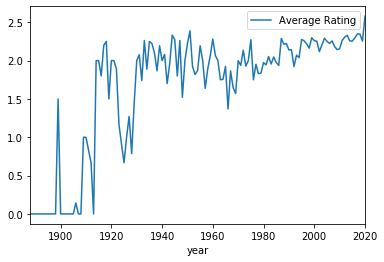

In [29]:
AvgRatingYear = pd.DataFrame(bechdel_imdb.sort_values('year').groupby('year').mean()['rating'])
ax=AvgRatingYear.plot()
ax.legend(["Average Rating"])

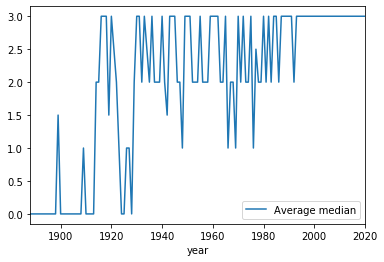

In [30]:
MedRatingYear = pd.DataFrame(bechdel_imdb.sort_values('year').groupby('year').median()['rating'])
ax=MedRatingYear.plot()
ax.legend(["Average median"])

In [31]:
# Yes woman representation has improved, as can be seen by the mean (and median graphs)

In [32]:
bechdel_imdb

,year,imdbid,rating,title,id
0,1888,0392728,0,Roundhay Garden Scene,8040
1,1892,0000003,0,Pauvre Pierrot,5433
2,1895,0132134,0,"Execution of Mary, Queen of Scots, The",6200
3,1895,0000014,0,Tables Turned on the Gardener,5444
4,1896,0000131,0,Une nuit terrible,5406
...,...,...,...,...,...
8569,2020,7134096,2,"Rhythm Section, The",8994
8570,2020,8461042,3,"Marijuana Conspiracy , The",8859
8571,2020,1502397,2,Bad Boys For Life,9071
8572,2020,7713068,3,Birds of Prey,9008


In [33]:
#Percentage of movies in the top 250 that have passed Bechdel test.
bechdel_imdb[bechdel_imdb.imdbid.isin(test.id)].rating.value_counts()[3]/(bechdel_imdb[bechdel_imdb.imdbid.isin(test.id)].shape[0])
#test.BechdelScore.value_counts()[3]/test.shape[0]

0.34893617021276596

In [34]:
#Percentage of movies not in the top 250 that have passed Bechdel test.
bechdel_imdb[~bechdel_imdb.imdbid.isin(test.id)].rating.value_counts()[3]/bechdel_imdb[~bechdel_imdb.imdbid.isin(test.id)].shape[0]

0.5835232042211296

1995    112
1996    120
1997    110
1998    135
1999    131
2000    150
2001    170
2002    179
2003    159
2004    198
2005    210
2006    254
2007    253
2008    264
2009    342
2010    348
2011    365
2012    346
2013    408
2014    385
2015    325
2016    310
2017    255
2018    217
2019    181
2020     38
Name: year, dtype: int64

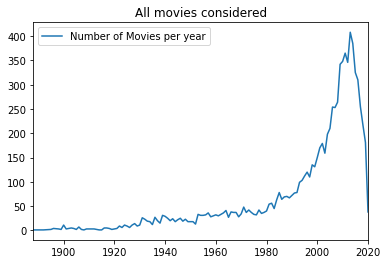

In [35]:
ax = bechdel_imdb.year.value_counts().sort_index().plot(title="All movies considered")
ax.legend(["Number of Movies per year"])

bechdel_imdb.year.value_counts().sort_index()[100:126]
# The website that computes the Bechdel test for each movie clearly has a preference for old movies ( or at least of the early deacde of 2010)
# Obviously movies from this year have been discounted (as there may have not been enogh time to evaluate them)
# But there is a clear drop in the amount of movies starting in 2013.

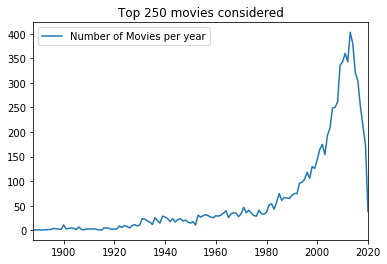

In [36]:
#Movies not in the top 250
ax = bechdel_imdb[~bechdel_imdb.imdbid.isin(test.id)].year.value_counts().sort_index().plot(title="Top 250 movies considered")
ax.legend(["Number of Movies per year"])

#Recent movies take some time to stack up the minimum amount of ratings to be inserted in the top lists. That's why a signifiative drop is seen in around the year of 2014.
#Also psychological effects, may also have explanatory power in the sense that in order to have a top rating, these movies must acquire a "classic" status.

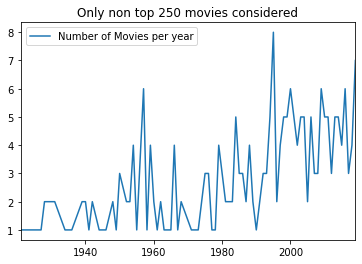

In [37]:
#Movies in the top 250
ax = bechdel_imdb[bechdel_imdb.imdbid.isin(test.id)].year.value_counts().sort_index().plot(title="Only non top 250 movies considered")
ax.legend(["Number of Movies per year"])
#The number of movies is more homogeneous throughout the years